In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from datasets import load_dataset
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [ ]:
                                                     # # #  ASSIGNMENT TASK's  # # #

In [ ]:
                                             # # # Part-I: Naive Bayes Classifier # # #      

In [ ]:
#TASK 1 ---> THEORY QUESTION : : :

In [ ]:
#ANSWER 1 : : :

In [ ]:
The conditional independence of features given the class label is the fundamental premise of Naive Bayes. This implies that Naive Bayes assumes that each feature is independent of all other features once the class label is known; that is, knowing the value of one feature does not reveal the value of any other feature, given the class.

By multiplying the individual likelihoods of features for each class, Naive Bayes classifiers exploit this assumption to simplify probability calculations, resulting in a straightforward and computationally efficient algorithm.

Naive Bayes often works well in practice, especially for high-dimensional tasks like text classification, even though it makes a strong (and frequently unrealistic) assumption about real-world data, where feature dependencies are typically present.

In [ ]:
#ANSWER 2 : : :

In [ ]:
Differences Between GaussianNB, MultinomialNB, and BernoulliNB
These are three main variants of the Naive Bayes classifier, each tailored to different types of data:

1. GaussianNB
Data Type: Continuous features.

Assumption: The features' values for each class are distributed according to a Gaussian (normal) distribution.

Usage: Suitable for data where the features are real-valued measurements (e.g., height, weight, temperature).

Example: Classifying iris flower species based on petal length and width.

2. MultinomialNB
Data Type: Discrete features, typically count data.

Assumption: Features represent the counts or frequency of events, and these follow a multinomial distribution.

Usage: Most commonly used for document classification, where features are word counts or term frequencies in text data (e.g., spam- or topic-classification of emails).

Example: Determining whether an email is spam based on the frequency of certain keywords in the text.

3. BernoulliNB
Data Type: Binary/boolean features (0 or 1).

Assumption: Each feature is a binary variable (present/absent, yes/no), and follows a Bernoulli distribution.

Usage: Also used in text classification, but when features represent whether a word occurs in a document (not the number of times it occurs), or for any scenario with binary indicators.

Example: Classifying documents as positive or negative sentiment based on whether certain keywords are present.

In [ ]:
#ANSWER 3 : : :

In [ ]:
Naive Bayes is considered suitable for high-dimensional data primarily because of its core assumption of conditional independence among features and its computational simplicity. Specifically:

It assumes that given the class label, each feature is independent of others, which drastically simplifies probability calculations by treating each feature separately rather than modeling complex joint distributions.

This assumption allows the model to efficiently handle a large number of features (high dimensions), as it only needs to estimate the likelihood of each feature independently per class.

With very few tunable parameters and simple computations, Naive Bayes scales well and trains quickly even on datasets with thousands or more features, such as text classification where words form high-dimensional sparse vectors.

In high-dimensional spaces, data points tend to be more separable, so simplistic models like Naive Bayes can perform surprisingly well because clusters of classes are easier to distinguish.

It performs well with sparse data typical of high-dimensional problems, especially with text or document classification using word frequencies or occurrences.

Hence, Naive Bayes’ efficiency, scalability, and reasonable performance despite the independence assumption make it a popular choice for high-dimensional scenarios such as spam filtering, sentiment analysis, and document categorizatio

In [ ]:
#TASK 2 ---> Spam Detection using MultinomialNB

In [6]:
#A :
data = load_dataset("sms_spam")
df = data['train'].to_pandas()
print(df.head())

                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0


In [7]:
# B. 
vect = CountVectorizer()
X = vect.fit_transform(df['sms'])  # <-- change fixes at this place
y = df['label']

In [8]:
# C. 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_tr, y_tr)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [10]:
# D.
#prediction
y_prediction = model.predict(X_te)

#evaluation
print("Accuracy:", accuracy_score(y_te, y_prediction))
print("Precision:", precision_score(y_te, y_prediction))
print("Recall:", recall_score(y_te,y_prediction))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_prediction))

Accuracy: 0.9847533632286996
Precision: 0.9390243902439024
Recall: 0.9565217391304348
Confusion Matrix:
 [[944  10]
 [  7 154]]


In [ ]:
#TASK 3 ---> GaussianNB with Iris or Wine Dataset

In [11]:
# A.
data = load_iris(as_frame=True)
X = data.data
y = data.target

In [12]:
# B. 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#C.
gauss = GaussianNB()
gauss.fit(X_tr, y_tr)
y_prediction_gauss = gauss.predict(X_te)

print("GaussianNB Performance:\n", classification_report(y_te, y_prediction_gauss))

GaussianNB Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
#D. 
logistic= LogisticRegression(max_iter=200)
logistic.fit(X_tr, y_tr)
y_prediction_logistic= logistic.predict(X_te)

print("Logistic Regression Performance:\n", classification_report(y_te, y_prediction_logistic))

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
                                                 # # #  PART 2: : Decision Trees # # #

In [ ]:
# Task 4: Conceptual Questions ---->

In [ ]:
#ANSWER -1 : : 

In [ ]:
1. Entropy
Entropy is a fundamental concept from information theory that measures the amount of uncertainty or impurity present in a dataset. In the context of machine learning—particularly decision tree algorithms like ID3 and C4.5—entropy helps quantify how mixed a dataset is in terms of different class labels.

When all the instances in a dataset belong to the same class, the entropy is zero, indicating no uncertainty. Conversely, when instances are evenly distributed among all possible classes, the entropy is at its maximum, reflecting the highest level of disorder.

Mathematically, for a dataset 
𝑆
S with classes 𝑐1,𝑐2,…,𝑐𝑛 the entropy is defined as:

                                               Entropy(S)=− i=1∑np(ci)log 2p(ci)

where 𝑝(𝑐𝑖)p(c i) is the proportion of instances belonging to class 𝑐i.

2. Information Gain
Information Gain measures the reduction in entropy achieved by partitioning the dataset based on a particular attribute. It essentially tells us how much “information” a feature gives us about the class label.

When building a decision tree, the attribute with the highest information gain is selected for splitting, as it leads to the most significant reduction in uncertainty.

Formally, the information gain of an attribute 
A with respect to dataset 
S is given by:


                                               Information Gain(S,A)=Entropy(S)− v∈Values(A)∑∣S∣∣S v∣⋅Entropy(Sv)
where:
Values(A) are the possible values of attribute 𝐴
𝑆𝑣S vis the subset of S where attribute A has value 𝑣
∣𝑆𝑣∣/∣𝑆∣ represents the proportion of the subset.


In [ ]:
#ANSWER -2: :

In [ ]:
1. Entropy
Entropy is derived from information theory and is used to measure the amount of randomness or disorder in a dataset. It quantifies the expected amount of information (in bits) needed to classify a randomly chosen instance. The goal in decision trees is to achieve splits that result in subsets with the lowest entropy.

Mathematical Definition:For a dataset 𝑆 with n classes:


                              Entropy(S)=− i=1∑np ilog 2(pi)
Entropy is zero when all instances belong to a single class (pure set).

Entropy is maximum when instances are equally distributed among all classes.

2. Gini Index
The Gini Index, also known as Gini Impurity, is a measure of statistical dispersion. It indicates the probability that a randomly chosen element would be incorrectly classified if it were randomly labeled according to the distribution of classes in the dataset.

Mathematical Definition:            Gini(𝑆)=1−∑𝑖=1𝑛𝑝𝑖2Gini(S)=1− i=1∑np i2

Gini Index is zero when all instances belong to one class.

It reaches its maximum when classes are equally distributed.
    
    

In [ ]:
#ANSWER -3 : :

In [ ]:
Overfitting in Decision Trees
A decision tree can overfit when it becomes too complex and models the training data too closely, including noise and minor fluctuations. This leads to poor generalization on unseen data, where the model performs well on the training set but fails to maintain accuracy on the test or real-world data.

Causes of Overfitting:
The tree is grown very deep with many branches.

The model captures irrelevant patterns or outliers in the training data.

There are insufficient constraints on splitting or stopping criteria.

Small leaf nodes with few samples lead to high variance.

Ways to Avoid Overfitting in Decision Trees
Pruning
Pre-pruning (Early Stopping): Stop the tree from growing when:

A node has fewer than a minimum number of samples.

The information gain is below a threshold.

Post-pruning: Allow the tree to grow fully and then remove branches that do not improve performance using validation data.

Limit Tree Depth
Restricting the maximum depth of the tree prevents it from becoming overly complex.

Minimum Samples for Split or Leaf
Set a threshold for the minimum number of samples required to split a node or to be at a leaf node. This avoids creating branches from small, possibly noisy data segments.

Use of Ensemble Methods
Techniques like Random Forest or Gradient Boosted Trees combine multiple decision trees to reduce overfitting by averaging results and improving generalization.

Cross-Validation
Evaluating the model using k-fold cross-validation ensures the model performs well across different subsets of the data and is not tailored to a single training set.



In [ ]:
# Task 5: Decision Tree on Titanic Dataset

In [17]:
#A.
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [18]:
#B.
# ALl Features
feature = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = df[feature + ['survived']]

df = df.dropna(subset=['sex', 'age', 'embarked'])

# Categorical variables
label_sex = LabelEncoder()
label_embarked = LabelEncoder()
df['sex'] = label_sex.fit_transform(df['sex'])
df['embarked'] = label_embarked.fit_transform(df['embarked'])

# missing numerical values fill it 
df['age'] = df['age'].fillna(df['age'].median())

X = df[feature]
y = df['survived']

In [19]:
#C. Train a DecisionTreeClassifier.
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

lcf = DecisionTreeClassifier(max_depth=4, random_state=42)
lcf.fit(X_tr, y_tr)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


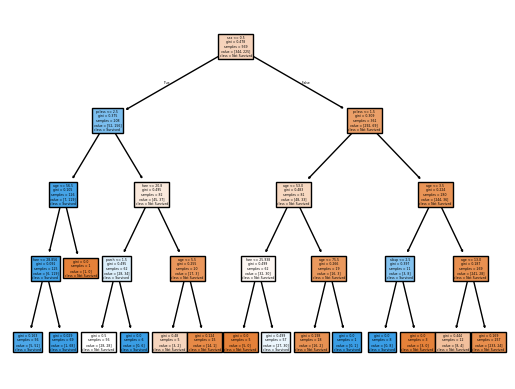

In [20]:
#D. Visualize using Plot_tree
plot_tree(lcf, feature_names=feature, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [22]:
#E.
y_prediction = lcf.predict(X_te)

print("Accuracy:", accuracy_score(y_te, y_prediction))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_prediction))

Accuracy: 0.7062937062937062
Confusion Matrix:
 [[67 13]
 [29 34]]


In [ ]:
# Task 6: Model Tuning

In [25]:
max_depths = range(1, 21)
train_accuracy=[]
test_accuracy=[]

for depth in max_depths:
    lcf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    lcf.fit(X_tr, y_tr)
    
    # Accuracy on training and test sets
    train=accuracy_score(y_tr, lcf.predict(X_tr))
    test=accuracy_score(y_te, lcf.predict(X_te))
    
    train_accuracy.append(train)
    test_accuracy.append(test)

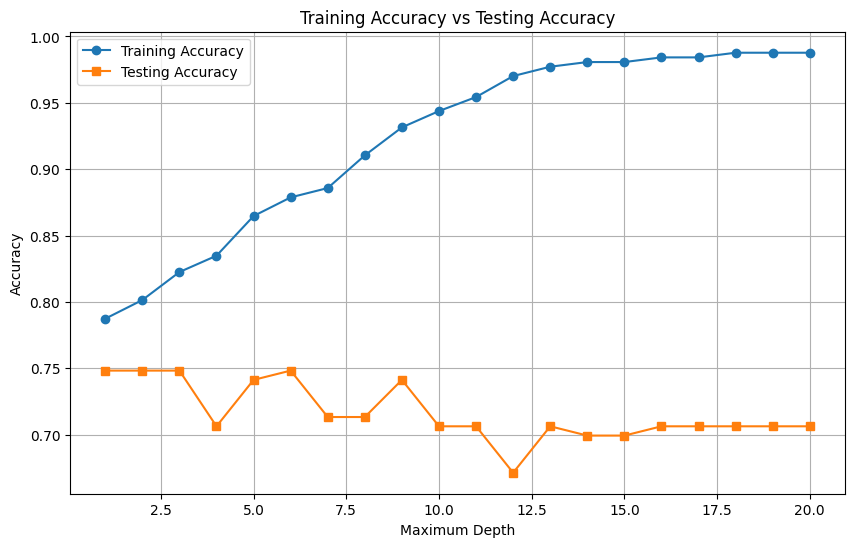

In [27]:
plt.figure(figsize=(10,6))
plt.plot(max_depths, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracy, label='Testing Accuracy', marker='s')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Testing Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# min_samples_split

In [28]:
splits = range(2, 21)
train_accuracy_split = []
test_accuracy_split = []

for split in splits:
    lcf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    lcf.fit(X_tr, y_tr)
    
    train_accuracy_split.append(accuracy_score(y_tr, lcf.predict(X_tr)))
    test_accuracy_split.append(accuracy_score(y_te, lcf.predict(X_te)))

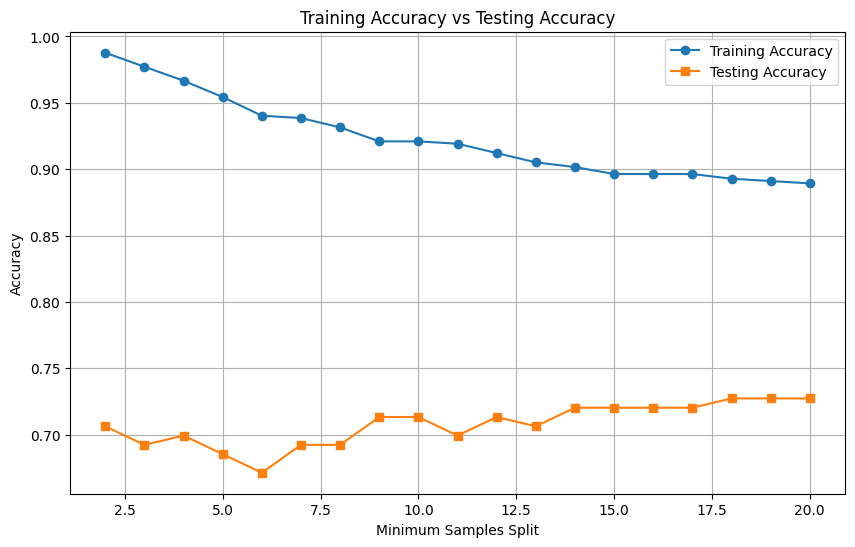

In [29]:
plt.figure(figsize=(10,6))
plt.plot(splits, train_accuracy_split, label='Training Accuracy', marker='o')
plt.plot(splits, test_accuracy_split, label='Testing Accuracy', marker='s')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Testing Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
                                    # Part-III: Ensemble Learning – Bagging, Boosting, Random Forest

In [ ]:
#ANSWER - 1: 

In [ ]:
Bagging and Boosting are both ensemble learning techniques used to improve the accuracy and robustness of machine learning models, particularly decision trees. However, they differ in methodology and purpose.

Bagging, short for Bootstrap Aggregating, is primarily focused on reducing variance and preventing overfitting. It works by generating multiple versions of a training dataset through random sampling with replacement. Each model is trained independently and in parallel on a different subset of the data. Once all models are trained, their predictions are combined using majority voting (for classification) or averaging (for regression). Since all models are treated equally and trained on different data samples, bagging ensures that errors due to high variance are minimized. A common example of bagging is the Random Forest algorithm.

On the other hand, Boosting is a technique that aims to reduce both bias and variance by training models sequentially. Each new model is trained to correct the errors made by the previous ones. In this approach, more importance is given to data points that were previously misclassified, forcing the next model to focus on the hard-to-learn patterns. The final prediction is a weighted combination of all the models, where better-performing models have more influence. Boosting builds a strong learner from a set of weak learners, and popular algorithms in this category include AdaBoost, Gradient Boosting, and XGBoost. While boosting often achieves higher accuracy, it can be more prone to overfitting if not properly regularized.

In [ ]:
#ANSWER -2 :

In [ ]:
Random Forest reduces variance by combining the predictions of multiple independent decision trees, each trained on a different random subset of the data. Here's how this works in detail:

Individual decision trees are known for having low bias but high variance, meaning they can model the training data very well but often perform poorly on unseen data due to overfitting. Random Forest tackles this by using two key techniques: bootstrap sampling and feature randomness.

First, it creates multiple decision trees using bootstrap sampling, which involves training each tree on a randomly selected subset of the training data (with replacement). This means each tree sees slightly different data, leading to varied model structures.

Second, at each split in the tree, Random Forest selects a random subset of features rather than considering all features. This ensures that the trees are not only trained on different data but also forced to consider different parts of the feature space, increasing diversity among them.

Since the errors of individual trees are mostly uncorrelated due to this randomness, averaging their predictions results in a model that is more stable and less sensitive to fluctuations in the training data. The key idea is that while any single decision tree may overfit, the average of many such trees tends to cancel out their individual fluctuations, thus reducing the overall variance without increasing the bias too much

In [ ]:
#ANSWER -3 : 

In [ ]:
Boosting-based methods are powerful and often achieve high predictive accuracy, they come with several notable weaknesses:

Prone to Overfitting:
Boosting can overfit the training data, especially if the number of boosting rounds is too high or the base learners are too complex. Since each new model focuses on correcting the mistakes of the previous ones, it may end up fitting noise in the data if not properly regularized.

Sensitive to Noisy Data and Outliers:
Boosting gives more weight to instances that are misclassified, which means it pays extra attention to difficult cases. If these misclassifications are due to noise or outliers, boosting will waste resources trying to "correct" what can't be corrected, potentially harming performance.

Computationally Expensive:
Since boosting is a sequential process, where each model depends on the results of the previous ones, it is typically slower to train compared to methods like bagging (e.g., Random Forest), which can be parallelized more easily.

Complexity in Tuning:
Boosting models, especially advanced ones like Gradient Boosting or XGBoost, have many hyperparameters (e.g., learning rate, number of estimators, tree depth). Tuning them effectively requires careful experimentation, which can be time-consuming.

Interpretability:
Boosting models are harder to interpret compared to a single decision tree. Although tools like SHAP can help explain feature importance, the overall model is still a black box compared to simpler models.

In [ ]:
# Task 8: Random Forest vs Decision Tree

In [32]:
#A : 
Rf_lcf = RandomForestClassifier(n_estimators=100, random_state=42)
Rf_lcf.fit(X_tr, y_tr)
y_prediction_Rf = Rf_lcf.predict(X_te)

# Decision Tree
Dt_lcf = DecisionTreeClassifier(random_state=42)
Dt_lcf.fit(X_tr, y_tr)
y_prediction_Dt = Dt_lcf.predict(X_te)

In [33]:
#B.
def evaluate(y_true, y_pred):
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
print("Decision Tree Performance")
evaluate(y_te, y_prediction_Dt)
print()
print("Random Forest Performance")
evaluate(y_te, y_prediction_Rf)

Decision Tree Performance
Accuracy : 0.7062937062937062
Precision: 0.6909090909090909
Recall   : 0.6031746031746031

Random Forest Performance
Accuracy : 0.7902097902097902
Precision: 0.7796610169491526
Recall   : 0.7301587301587301


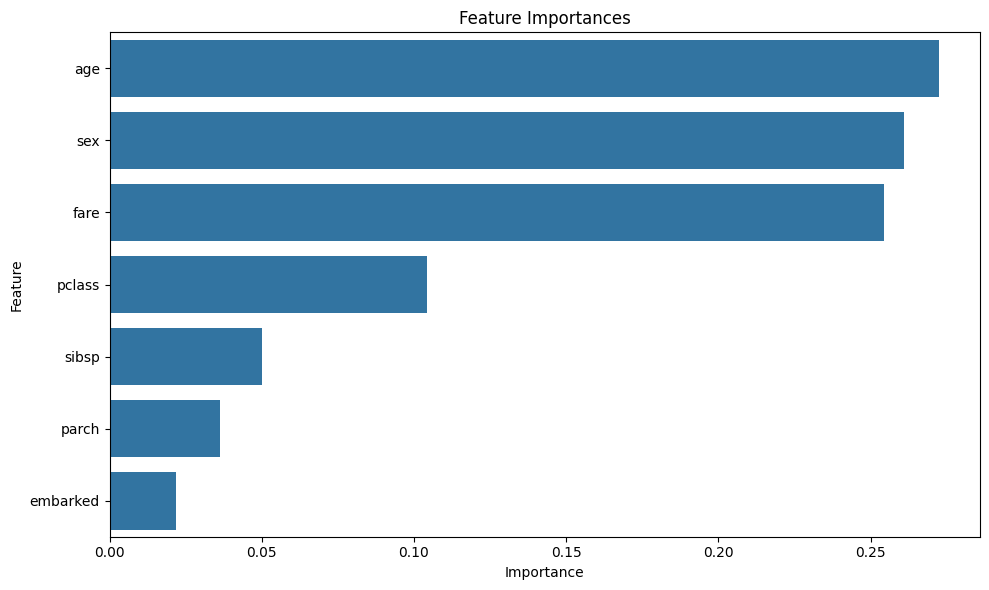

In [40]:
#C .


#Importances from Random Forest
importances = Rf_lcf.feature_importances_
feature_names = X_tr.columns

# Creating a dataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
# Task 9: AdaBoost or Gradient Boosting

In [45]:
def train(model):
    start_time = time.time()
    model.fit(X_tr, y_tr)
    train_time = time.time() - start_time
    
    y_prediction = model.predict(X_te)
    acc = accuracy_score(y_te, y_prediction)
    f1 = f1_score(y_te, y_prediction)
    
    print(f"Accuracy : {acc:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"Train Time: {train_time:.4f} seconds")
    return acc, f1, train_time

In [46]:
#decision tree:

Dt_lcf = DecisionTreeClassifier(random_state=42)
print("Decision Tree")
train(Dt_lcf)
print()

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest")
train(rf_clf)
print()

ab_clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42)
print("AdaBoost")
train(ab_clf)
print()

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
print("Gradient Boosting")
train(gb_clf)

Decision Tree
Accuracy : 0.7063
F1-Score : 0.6441
Train Time: 0.0053 seconds

Random Forest
Accuracy : 0.7902
F1-Score : 0.7541
Train Time: 0.3234 seconds

AdaBoost


C:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy : 0.8392
F1-Score : 0.8034
Train Time: 0.3173 seconds

Gradient Boosting
Accuracy : 0.7692
F1-Score : 0.7179
Train Time: 0.2564 seconds


(0.7692307692307693, 0.717948717948718, 0.25641441345214844)